# Nobody Likes Traffic
## Signs It's Slowing Down on I-94

## Introduction
This analysis is attempting to identify factors associated with heavy traffic.

The dataset is comprised of daily and hourly entries for westbound traffic midway between Minneapolis and St. Paul, the largest and capital cities, respectively, in Minnesota. It was collected from a Department of Transportation station on interstate 94 between October 2012 and September 2018.

The dataset was created by John Hogue from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

The colors used are the University of Minnesota school colors, gold for graphs and maroon for line plots. Go Gophers!

In [1]:
# import libraries, open file, set display options
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pprint
pd.options.display.float_format = '{:20,.4f}'.format
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

## Examine Data
A quick look at the beginning and ending of the data set shows nine columns with a mix of  categorical text and numeric information. The source of the data set states that an automatic traffic recorder (ATR) was used to tabulate traffic volume. It is expressed in the number of vehicles per hour.
* There don't appear to be any missing values.
* The statistical description looks unusual for rain and snow. There aren't any quartile values listed.
* The units for temperature don't look familiar and the max rain value seems high as well.

In [2]:
# display head, tail, and basic info
display(traffic.head())
display(traffic.tail())
display(traffic.info())
display(traffic.describe())

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.2800,0.0000,0.0000,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.3600,0.0000,0.0000,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.5800,0.0000,0.0000,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.1300,0.0000,0.0000,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.1400,0.0000,0.0000,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.4500,0.0000,0.0000,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.7600,0.0000,0.0000,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.7300,0.0000,0.0000,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.0900,0.0000,0.0000,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.1200,0.0000,0.0000,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


None

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,"48,204.0000","48,204.0000","48,204.0000","48,204.0000","48,204.0000"
mean,281.2059,0.3343,0.0002,49.3622,"3,259.8184"
std,13.3382,44.7891,0.0082,39.0158,"1,986.8607"
min,0.0000,0.0000,0.0000,0.0000,0.0000
25%,272.1600,0.0000,0.0000,1.0000,"1,193.0000"
50%,282.4500,0.0000,0.0000,64.0000,"3,380.0000"
75%,291.8060,0.0000,0.0000,90.0000,"4,933.0000"
max,310.0700,"9,831.3000",0.5100,100.0000,"7,280.0000"


## Clean Data
* Looking at the frequency of no rain and no snow verses some of either shows that the data set statistics for both columns are dominated by hours in which there was no precipitation. Both of these columns report millimeters per hour. The number of hours with some snow seems particularly low for this geographical region.
    * Creating a column with all positive rain values shows one outlier of 9,800 mm of rain that can be removed.
    * Creating a similar snow column doesn't reveal any outliers.
* The temperature column is in degrees Kelvin, which is useful in chemistry or physics but not traffic analysis. Converting to degrees Fahrenheit would be standard in the US.
    * The temperature column has ten rows with outlier temperature values that can be removed.

In [3]:
# separate rain column by no rain or some rain
no_rain = traffic[traffic["rain_1h"] == 0]
some_rain = traffic[traffic["rain_1h"] > 0]
print("Hours with no rain: ", len(no_rain))
print("Hours with some rain", len(some_rain))
# separate snow column by no snow or some snow
no_snow = traffic[traffic["snow_1h"] == 0]
some_snow = traffic[traffic["snow_1h"] > 0]
print("Hours with no snow: ", len(no_snow))
print("Hours with some snow: ", len(some_snow))

Hours with no rain:  44737
Hours with some rain 3467
Hours with no snow:  48141
Hours with some snow:  63


In [4]:
# create a some_rain column with any rain measurements greater than 0
traffic["some_rain"] = traffic["rain_1h"][traffic["rain_1h"] > 0]
# basic stats for some_rain
display(traffic["some_rain"].describe())

count             3,467.0000
mean                  4.6475
std                 166.9703
min                   0.2500
25%                   0.2500
50%                   0.6400
75%                   1.7800
max               9,831.3000
Name: some_rain, dtype: float64

In [5]:
# remove row with outlier rain values
traffic = traffic[traffic["rain_1h"]<100]
# basic stats for some_rain
display(traffic["some_rain"].describe())

count             3,466.0000
mean                  1.8123
std                   3.3100
min                   0.2500
25%                   0.2500
50%                   0.6400
75%                   1.7800
max                  55.6300
Name: some_rain, dtype: float64

In [6]:
# create a some_snow column with any snow measurements greater than 0
traffic["some_snow"] = traffic["snow_1h"][traffic["snow_1h"] > 0]
# basic stats for some_snow
display(traffic["some_snow"].describe())

count                63.0000
mean                  0.1702
std                   0.1499
min                   0.0500
25%                   0.0600
50%                   0.1000
75%                   0.2500
max                   0.5100
Name: some_snow, dtype: float64

In [7]:
# convert temperature column from Kelvin to Fahrenheit
def k_to_f(k_temp):
    f_temp = ((k_temp-273.15)*(9/5)) + 32
    return f_temp

traffic["temp"] = traffic["temp"].map(k_to_f)

In [8]:
# basic stats for temp column
display(traffic["temp"].describe())

count            48,203.0000
mean                 46.4998
std                  24.0085
min                -459.6700
25%                  30.2180
50%                  48.7400
75%                  65.5808
max                  98.4560
Name: temp, dtype: float64

In [9]:
# # look at outlier temp rows
# cold_days = traffic[traffic["temp"]<-100]
# display(cold_days)

In [10]:
# remove rows with outlier temperatures
traffic = traffic[traffic["temp"]>-100]
# basic stats for temp column
display(traffic["temp"].describe())

count            48,193.0000
mean                 46.6048
std                  22.8769
min                 -21.5680
25%                  30.2540
50%                  48.7580
75%                  65.5880
max                  98.4560
Name: temp, dtype: float64

## Overall traffic volume

The previous statistics for traffic volume shows that the minimum value is 0, the maximum value is 7280, and that traffic is usually somewhere in the middle. A histogram shows an interesting distribution. The mean is heavily influenced by how often the traffic is really light and how often the traffic is fairly bad.

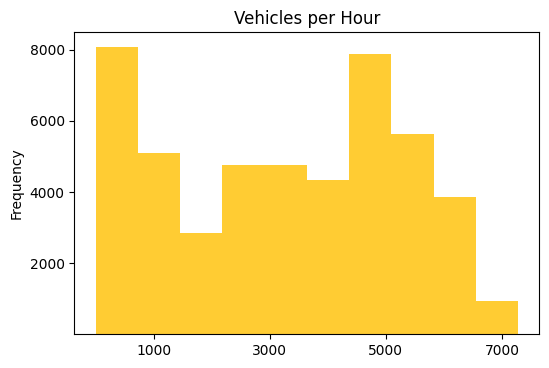

In [11]:
# create histogram of traffic volume for entire data set
traffic["traffic_volume"].plot.hist(color="#FFCC33")
plt.title("Vehicles per Hour")
plt.xticks([1000,3000,5000,7000], [1000,3000,5000,7000])
plt.yticks([2000,4000,6000,8000], [2000,4000,6000,8000])
plt.show()

## Aggregate by day or night
Creating a daytime group (7:00 am to 6:00 pm) and a nighttime group (7:00 pm to 6:00 am) reveals unsurprising differences in traffic volume.
* The histograms clearly show:
    * a left skewed normal distribution for daytime traffic, with the mean traffic volume of about 4,600 vehicles per hour.
    * a right skewed distribution for nighttime traffic. The mean traffic volume is a little less than 1,800 vehicles per hour.
* This would suggest that including the nighttime data could invalidate any conclusion. That being said, there is some occurrence of high traffic in the evenings. It would be worthwhile to take a look and see if this is just overlap from the day and what the conditions where that caused the increase.

In [12]:
# transform column to datetime
traffic["date_time"] = pd.to_datetime(traffic["date_time"])
# create date_time series
day_night = traffic["date_time"].dt.hour
# create day traffic series from 0700 to 1800
day_traffic = day_night.between(7, 18)
day_traffic = traffic.loc[day_traffic].copy()
# create night traffic series from 1900 to 0600
night_traffic = day_night.between(19, 24) | day_night.between(0, 6)
night_traffic = traffic.loc[night_traffic].copy()
# verify
print("The number of rows and columns for the day and night series.")
display(day_traffic.shape)
display(night_traffic.shape)

The number of rows and columns for the day and night series.


(23874, 11)

(24319, 11)

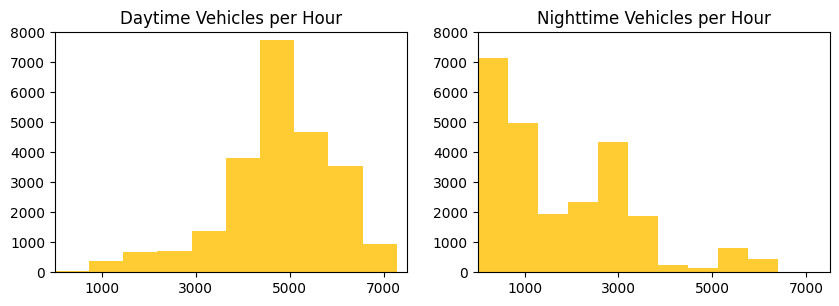

In [13]:
# create two graphs
plt.figure(figsize=(10,7))
# daytime traffic volume histogram
plt.subplot(2,2,1)
day_traffic["traffic_volume"].plot.hist(color="#FFCC33")
plt.title("Daytime Vehicles per Hour")
plt.xticks([1000,3000,5000,7000], [1000,3000,5000,7000])
plt.xlim(0,7500)
plt.ylim(0,8000)
plt.ylabel("")
# nighttime traffic volume histogram
plt.subplot(2,2,2)
night_traffic["traffic_volume"].plot.hist(color="#FFCC33")
plt.title("Nighttime Vehicles per Hour")
plt.xticks([1000,3000,5000,7000], [1000,3000,5000,7000])
plt.xlim(0,7500)
plt.ylim(0,8000)
plt.ylabel("")
plt.show()

In [14]:
# basic daytime and nighttime stats
display(day_traffic.describe())
display(night_traffic.describe())

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,some_rain,some_snow
count,"23,874.0000","23,874.0000","23,874.0000","23,874.0000","23,874.0000","1,770.0000",34.0000
mean,48.4347,0.1213,0.0003,53.1255,"4,762.3038",1.6365,0.1779
std,23.4823,0.8804,0.0089,37.5635,"1,174.1816",2.8249,0.1553
min,-21.5680,0.0000,0.0000,0.0000,0.0000,0.2500,0.0500
25%,31.1540,0.0000,0.0000,5.0000,"4,253.0000",0.2500,0.0600
50%,51.1340,0.0000,0.0000,75.0000,"4,820.0000",0.6400,0.1000
75%,68.5220,0.0000,0.0000,90.0000,"5,559.0000",1.6900,0.3025
max,98.4560,44.4500,0.5100,100.0000,"7,280.0000",44.4500,0.5100


,temp,rain_1h,snow_1h,clouds_all,traffic_volume,some_rain,some_snow
count,"24,319.0000","24,319.0000","24,319.0000","24,319.0000","24,319.0000","1,696.0000",29.0000
mean,44.8084,0.1392,0.0002,45.6870,"1,785.5309",1.9959,0.1610
std,22.1202,1.1111,0.0074,40.0464,"1,441.8681",3.7420,0.1455
min,-20.0740,0.0000,0.0000,0.0000,0.0000,0.2500,0.0500
25%,29.4080,0.0000,0.0000,1.0000,530.5000,0.2500,0.0500
50%,46.8140,0.0000,0.0000,40.0000,"1,287.0000",0.6700,0.1000
75%,63.5900,0.0000,0.0000,90.0000,"2,819.0000",1.8500,0.2500
max,94.1540,55.6300,0.5100,100.0000,"6,386.0000",55.6300,0.5100


## Daytime Group
* Looking at daytime values initially will provide most of the analysis.
* The mean traffic volume by month is not that far off the mean traffic volume for all day entries, 4762. The standard deviation between the months is only 190. The graph does show two dips, with one corresponding to winter months in the US. The other looks like it occurs during July, which is unusual because that's during the summer when traffic tends to be high.
    * A closer look at the annual distribution for the month of July shows an atypical decrease in 2016. A quick google search points to a large highway construction project taking place that year. https://www.mprnews.org/story/2016/07/22/i94-stpaul-shutdown-twin-cities-weekend-road-woes
* The mean daytime traffic volume does change considerably depending on the day of the week. Saturday shows a considerable dip and Sunday a little more. But there are still plenty of cars making the drive!
* Looking at the traffic volume for weekdays by hour indicates a peak in the morning (by 7:00 am if not earlier) and again in the afternoon at 4:00 pm.
* A similar look at weekend hours shows a slow build in the morning with fairly steady traffic until evening.

count                12.0000
mean              4,767.5037
std                 189.9449
min               4,374.8346
25%               4,676.7308
50%               4,880.0964
75%               4,907.9511
max               4,928.3020
Name: traffic_volume, dtype: float64

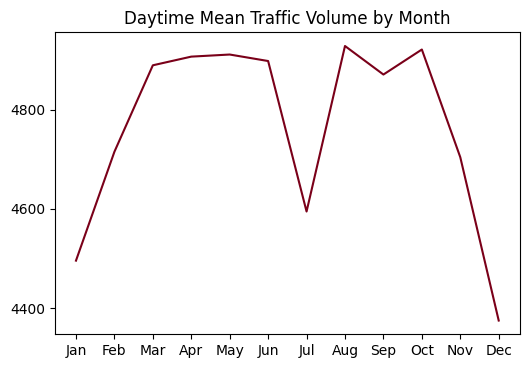

In [15]:
# create month column and convert info in date_time column to months 1-12
day_traffic["month"] = day_traffic["date_time"].dt.month
# group daytime by month and get the mean column values for each month
day_traffic_month_group = day_traffic.groupby("month").mean()
# basic stats for daytime month group mean traffic volume
display(day_traffic_month_group["traffic_volume"].describe())
# line plot of daytime month group mean traffic volumes
day_traffic_month_group["traffic_volume"].plot.line(c="#7A0019")
plt.title("Daytime Mean Traffic Volume by Month")
plt.yticks([4400,4600,4800], [4400,4600,4800])
plt.xlabel("")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],["Jan","Feb","Mar","Apr","May","Jun",
                                         "Jul","Aug","Sep","Oct","Nov","Dec"])
plt.show()

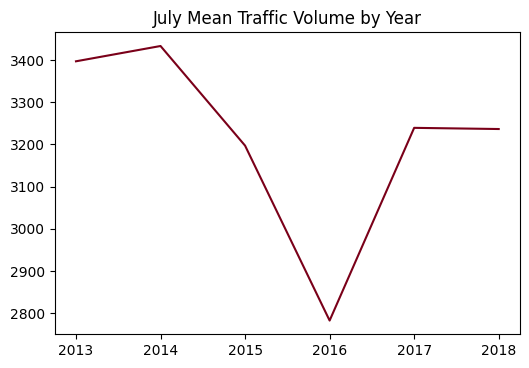

In [16]:
# group July by year
july_months = traffic[traffic["date_time"].dt.month == 7]
july_yearly_group = july_months.groupby(traffic["date_time"].dt.year)
# line plot of July yearly group mean traffic volume
july_yearly_group["traffic_volume"].mean().plot.line(c="#7A0019")
plt.title("July Mean Traffic Volume by Year")
plt.xlabel("")
plt.show()

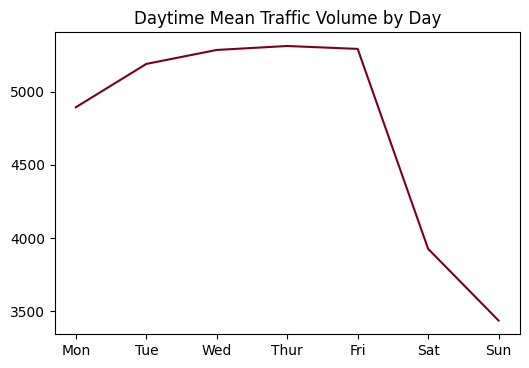

In [17]:
# create day_of_week column and convert info in date_time column to days 0-6
day_traffic["day_of_week"] = day_traffic["date_time"].dt.dayofweek
# group daytime by day of week and get the mean column values for each day
day_traffic_day_group = day_traffic.groupby("day_of_week").mean()
# line plot of daytime week of day group mean traffic volumes
day_traffic_day_group["traffic_volume"].plot.line(c="#7A0019")
plt.title("Daytime Mean Traffic Volume by Day")
plt.yticks([3500,4000,4500,5000],[3500,4000,4500,5000])
plt.xlabel("")
plt.xticks([0,1,2,3,4,5,6],["Mon","Tue","Wed","Thur","Fri","Sat","Sun"])
plt.show()

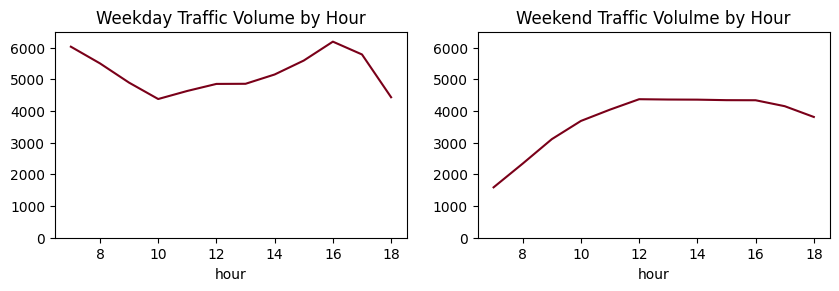

In [18]:
# create an hour column and convert info in date_time column to hours 0 to 23
day_traffic["hour"] = day_traffic["date_time"].dt.hour
# group daytime into weekdays (4=Friday) and weekends (5=Saturday)
weekdays = day_traffic[day_traffic["day_of_week"] <= 4]
weekends = day_traffic[day_traffic["day_of_week"] >= 5]
# group weekday entries by hour and get the mean column values for each hour
weekdays_hours_group = weekdays.groupby("hour").mean()
# group weekend entries by hour and get the mean column values for each hour
weekends_hours_group = weekends.groupby("hour").mean()
# basic stats for daytime weekday hour group mean traffic volume
# display(weekdays_hours_group["traffic_volume"].describe())
# create two graphs
plt.figure(figsize=(10,6))
# line plot of weekdays hours group mean traffic volumes 
plt.subplot(2,2,1)
weekdays_hours_group["traffic_volume"].plot.line(c="#7A0019")
plt.title("Weekday Traffic Volume by Hour")
plt.ylim(0,6500)
# line plot of weekends hours group mean traffic volumes
plt.subplot(2,2,2)
weekends_hours_group["traffic_volume"].plot.line(c="#7A0019")
plt.title("Weekend Traffic Volulme by Hour")
plt.ylim(0,6500)
plt.show()

## Nightime Group

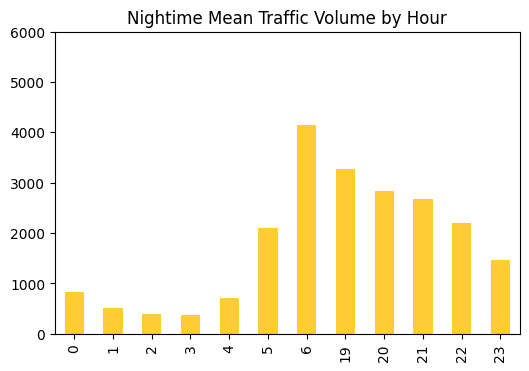

In [19]:
# line plot for nighttime traffic vollume by hour
night_traffic["hour"] = night_traffic["date_time"].dt.hour
nighttime_hours_group = night_traffic.groupby("hour").mean()
nighttime_hours_group["traffic_volume"].plot.bar(color="#FFCC33")
plt.ylim(0,6000)
plt.title("Nightime Mean Traffic Volume by Hour")
plt.xlabel("")
plt.show()

## Weather
### Part 1
There are small correlations between daytime traffic volume and measurable amounts of snow and rain. Neither of these associations would be obvious though.
* The snow correlation is probably just an artifact due to the low sample number.
* The subtle relationship between rain and traffic volume appears from the scatter chart to be less causation than simple correlation. It is likely that there are simply a fair number of rainy days in this area.

In [20]:
# Pearson correlation coefficient for all daytime columns
day_traffic.corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,some_rain,some_snow,month,day_of_week,hour
temp,1.0000,0.0849,-0.0197,-0.1408,0.1255,0.2065,0.5590,0.2240,0.0030,0.1632
rain_1h,0.0849,1.0000,0.0068,0.0885,-0.0407,1.0000,0.7923,0.0194,-0.0047,-0.0168
snow_1h,-0.0197,0.0068,1.0000,0.0277,0.0013,-0.0111,1.0000,0.0268,-0.0088,0.0039
clouds_all,-0.1408,0.0885,0.0277,1.0000,-0.0333,0.0850,0.1273,0.0004,-0.0418,0.0235
traffic_volume,0.1255,-0.0407,0.0013,-0.0333,1.0000,-0.1723,0.4014,-0.0227,-0.4163,0.1724
some_rain,0.2065,1.0000,-0.0111,0.0850,-0.1723,1.0000,nan,0.0084,0.0343,-0.0429
some_snow,0.5590,0.7923,1.0000,0.1273,0.4014,nan,1.0000,0.2191,0.0110,0.0840
month,0.2240,0.0194,0.0268,0.0004,-0.0227,0.0084,0.2191,1.0000,0.0138,0.0080
day_of_week,0.0030,-0.0047,-0.0088,-0.0418,-0.4163,0.0343,0.0110,0.0138,1.0000,-0.0025
hour,0.1632,-0.0168,0.0039,0.0235,0.1724,-0.0429,0.0840,0.0080,-0.0025,1.0000


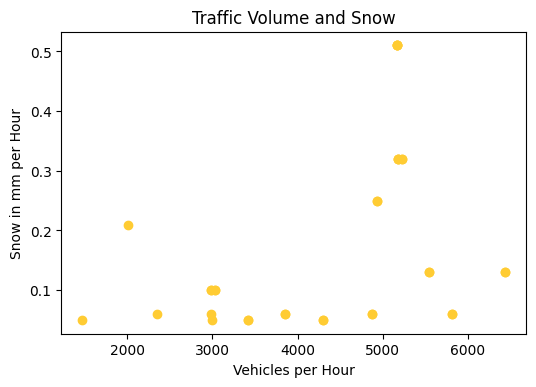

In [21]:
# scatter plot for daytime traffic volume and some snow
plt.scatter(day_traffic["traffic_volume"],day_traffic["some_snow"],c="#FFCC33")
plt.title("Traffic Volume and Snow")
plt.xlabel("Vehicles per Hour")
plt.ylabel("Snow in mm per Hour")
plt.show()

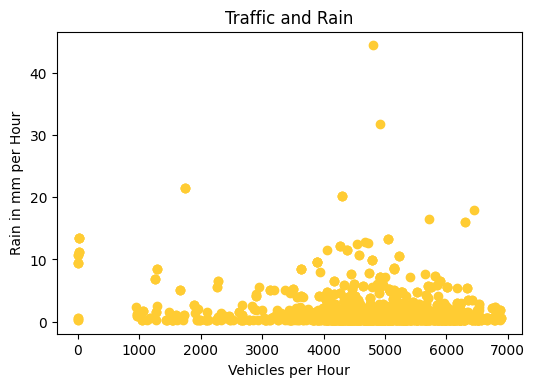

In [22]:
# scatter plot for daytime traffic volume and some rain
plt.scatter(day_traffic["traffic_volume"], day_traffic["some_rain"],c="#FFCC33")
plt.title("Traffic and Rain")
plt.xlabel("Vehicles per Hour")
plt.ylabel("Rain in mm per Hour")
plt.show()

## Weather
### Part 2
* Grouping daytime traffic by the categorical options in the ```weather_main``` column provides an interesting graph but no real insight. The traffic volume seems to be fairly similar across the group.
* Grouping daytime traffic by the categorical options in the ```weather_description``` doesn't reveal any surprises either. The highest traffic volumes were on days with snow, so maybe we can conclude the Minnesotans are pretty resilient to bad weather!

In [23]:
# group day traffic by weather main and weather description
weather_main = day_traffic.groupby("weather_main").mean()
weather_description = day_traffic.groupby("weather_description").mean()

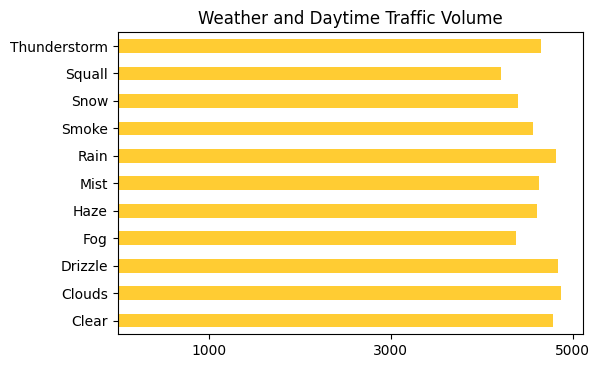

In [24]:
# bar chart for weather main
weather_main["traffic_volume"].plot.barh(color="#FFCC33")
plt.xticks([1000,3000,5000], [1000,3000,5000])
plt.ylabel("")
plt.title("Weather and Daytime Traffic Volume")
plt.show()

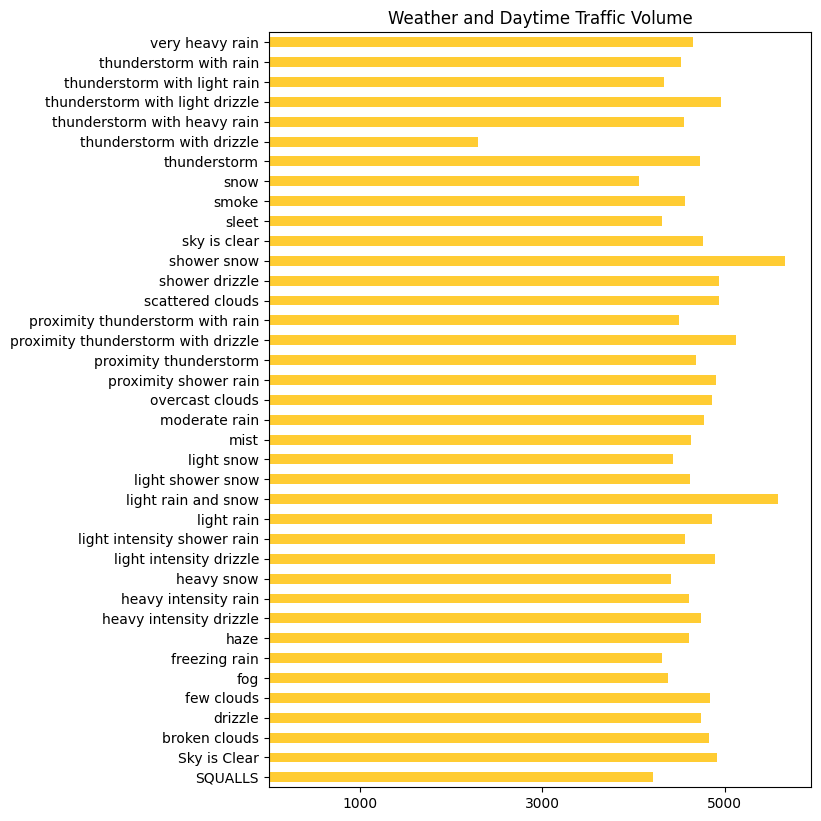

In [25]:
# bar chart for weather description
weather_description["traffic_volume"].plot.barh(figsize=(7,10), color="#FFCC33")
plt.xticks([1000,3000,5000], [1000,3000,5000])
plt.ylabel("")
plt.title("Weather and Daytime Traffic Volume")
plt.show()

## Conclusion

* It's a pretty safe bet that if it's a weekday, especially during rush hour that your going to see a lot of traffic on I-94. On the weekends there is less traffic, and in the evenings even less.
* There is also a decrease in traffic volume the winter months.
* Looking at weather conditions showed no reliable correlations. Even clear skies did not show a relationship with high traffic volumes.
* Nighttime traffic volumes are heavily influenced by hour. Traffic increases dramatically at 5:00 am and 6:00 am, then tapers off after 7:00 pm.
* It is notable that using mean values makes it difficult to be aware of larger values. Because traffic is such a consequential and daily factor for so many entities, it might be worth reducing the sample to a smaller set of high traffic volume rows.
* Lastly, because this data set has a large amount of granular weather information, comparing similar hours with good weather and bad weather could be informative.